In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import collections.abc
import json

def aggregate_and_means(data):
    means = np.array([])
    for (s_id, reps) in data.items():
        reps = reps['reps']
        avg = np.nanmean(list(reps.values()))
        means = np.append(means, avg)
        # count how many non-nan values
        r_count = (~np.isnan(list(reps.values()))).sum()
        data[s_id] = {'count': int(r_count), 'mean': avg, 'reps': reps}

    return means, data

def plot_normal(data, ax, title):
    ax.set_xlim(left=-0.125, right=1.0)
    count_, bins, _ = ax.hist(data, bins=N_BINS_NORMAL, density=True)
    # fitting curve
    mu, std = norm.fit(data)
    xs = np.arange(-0.125, 1.0, 0.01)
    ax2 = ax.twinx()
    ax2.plot(
             xs,
             norm.cdf(xs, loc=mu, scale=std),
             linewidth=2, color='r', label=f'$\mu={mu:.3f}$,\n$stdev={std:.3f}$'
            )
    ax2.set_ylabel(f"$CDF_{{\mu,\sigma}}$")
    ax2.legend()

    ax.axvline(mu, color='k', linestyle='dashed', linewidth=1)
    ax2.axhline(norm.cdf(mu, loc=mu, scale=std),
               color='k', linestyle='dashed', linewidth=1)
    ax.annotate(f'{mu:.2f}', xy=(mu, 0), xytext=(mu, -1.5))
    ax.set_title(title)
    ax.grid()

<ipython-input-2-1618254ce036>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


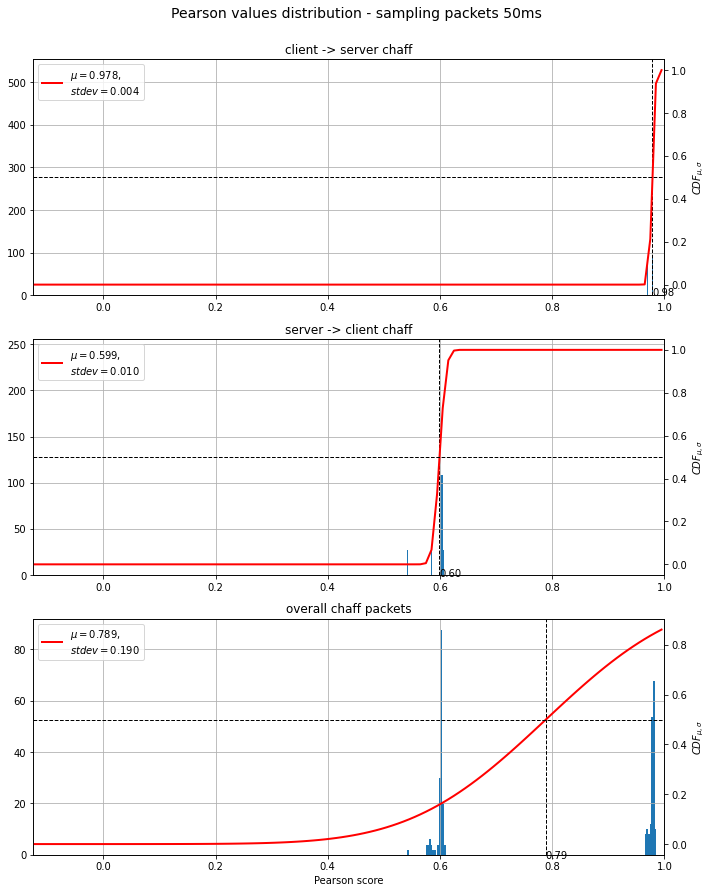

In [2]:
file = "/Volumes/Isis/Thesis/qcd-experiments/results/pearson/front/config1/dead/aggregate/res_dummy.json"

N_BINS_NORMAL = 150

with open(file, "r") as f:
    jsonfile = json.load(f)
pearsons_TX = jsonfile['TX']
pearsons_RX = jsonfile['RX']


(tx_means, pearsons_TX) = aggregate_and_means(pearsons_TX)
(rx_means, pearsons_RX) = aggregate_and_means(pearsons_RX)

# cleanup values
tx_means = tx_means[~np.isnan(tx_means)]
rx_means = rx_means[~np.isnan(rx_means)]
assert (not np.isnan(tx_means).any())
assert (not np.isnan(rx_means).any())

f, ax = plt.subplots(3, 1, figsize=(10, 12))
# plot dummy TX
plot_normal(tx_means, ax[0], 'client -> server chaff')
# plot dummy RX
plot_normal(rx_means, ax[1], 'server -> client chaff')
# plot all
plot_normal(np.append(rx_means, tx_means),
            ax[2],
            "overall chaff packets")
ax[2].set_xlabel("Pearson score")
f.suptitle('Pearson values distribution - sampling packets 50ms', y=1.03, fontsize=14)
f.tight_layout()
f.show()

# Redoing as boxplots

In [32]:
resdir = "/Volumes/Isis/Thesis/qcd-experiments/results"
confs = ["config1", "config2", "config3", "config4"]

conf1_cafe_f = f"{resdir}/pearson/front/config1/baddcafe/aggregate/res_dummy.json"
conf2_cafe_f = f"{resdir}/pearson/front/config2/baddcafe/aggregate/res_dummy.json"
conf3_cafe_f = f"{resdir}/pearson/front/config3/baddcafe/aggregate/res_dummy.json"
conf4_cafe_f = f"{resdir}/pearson/front/config4/baddcafe/aggregate/res_dummy.json"
cafe_f = [conf1_cafe_f, conf2_cafe_f, conf3_cafe_f, conf4_cafe_f]

conf1_dead_f = f"{resdir}/pearson/front/config1/dead/aggregate/res_dummy.json"
conf2_dead_f = f"{resdir}/pearson/front/config2/dead/aggregate/res_dummy.json"
conf3_dead_f = f"{resdir}/pearson/front/config3/dead/aggregate/res_dummy.json"
dead_f = [conf1_dead_f, conf2_dead_f, conf3_dead_f]

# data cafe
cafe = {}
data_cafe = []
for file, conf in zip(cafe_f, confs):
    with open(file, "r") as f:
        jsonfile = json.load(f)
    pearsons_TX = jsonfile['TX']
    pearsons_RX = jsonfile['RX']
    (tx_means, pearsons_TX) = aggregate_and_means(pearsons_TX)
    (rx_means, pearsons_RX) = aggregate_and_means(pearsons_RX)
    cafe[conf] = {"TX": tx_means, "RX": rx_means}
    data_cafe += [rx_means]

# data dead
dead = {}
data_dead = []
for file, conf in zip(dead_f, confs[:-1]):
    with open(file, "r") as f:
        jsonfile = json.load(f)
    pearsons_TX = jsonfile['TX']
    pearsons_RX = jsonfile['RX']
    (tx_means, pearsons_TX) = aggregate_and_means(pearsons_TX)
    (rx_means, pearsons_RX) = aggregate_and_means(pearsons_RX)
    dead[conf] = {"TX": tx_means, "RX": rx_means}
    data_dead += [rx_means]

print(len(data_cafe))
print(len(data_dead))

4
3


/Users/luca/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/luca/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'QCD-FRONT accuracy with different parameters configuration.')

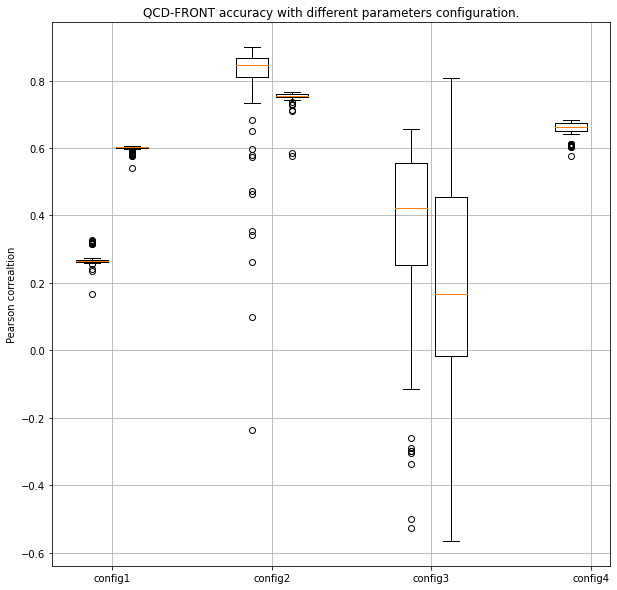

In [34]:
f, ax = plt.subplots(1,1, figsize=(10,10))

bpcafe = ax.boxplot(data_cafe,
                    positions=np.array(range(len(data_cafe)))*2.0-0.25,
                    widths=0.4
                    )
bpdead = ax.boxplot(data_dead,
                    positions=np.array(range(len(data_dead)))*2.0+0.25,
                    widths=0.4
                    )
ax.set_xticks(range(0, len(confs)*2, 2))
ax.set_xticklabels(confs)
ax.grid()

ax.set_ylabel("Pearson correaltion")
ax.set_title("QCD-FRONT accuracy with different parameters configuration.")

In [27]:
from scipy import stats

print(stats.median(data_cafe[0]))

AttributeError: module 'scipy.stats' has no attribute 'median'